# Explore here

# Pip & Requirements

In [21]:
pip install -r /workspaces/Logistic_Regression_Project_Tutorial/requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# All Imports

In [22]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


## **Step 1: Data collection**

In [23]:
bank_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
bank_data.to_csv("/workspaces/Logistic_Regression_Project_Tutorial/data/raw/bank_data.csv", index=False)


#poner los csv en gitgnore

In [25]:
bank_data.tail(5) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## **Step 2: Exploration and data cleaning**

In [26]:
bank_data.shape

(41188, 21)

In [27]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

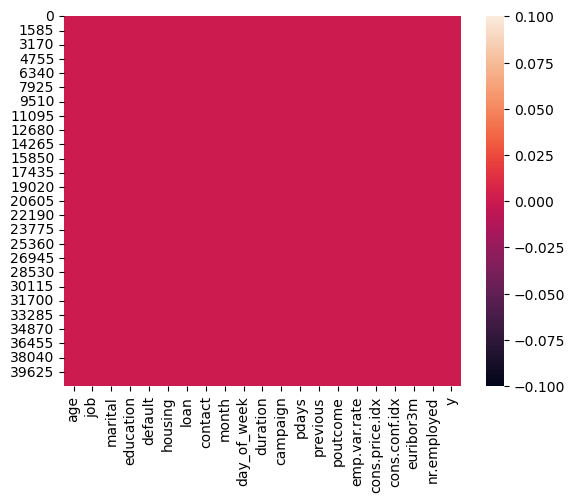

In [11]:
sns.heatmap(bank_data.isnull(), annot = False)

### Descriptive Statistics

In [12]:
# descriptive statistics for percentiles
bank_data.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99], include = np.number).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
age,41188.0,40.024060,10.421250,17.000,26.000,28.000,32.000,38.000,47.000,49.000,55.000,58.000,71.000,98.000
duration,41188.0,258.285010,259.279249,0.000,36.000,59.000,102.000,180.000,319.000,368.000,551.000,752.650,1271.130,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,1.000,1.000,2.000,3.000,3.000,5.000,7.000,14.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,2.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-2.900,-1.800,-1.800,1.100,1.400,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,92.713,92.893,93.075,93.749,93.994,93.994,94.465,94.465,94.465,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-47.100,-46.200,-42.700,-41.800,-36.400,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,0.797,1.046,1.344,4.857,4.961,4.962,4.964,4.966,4.968,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5017.500,5076.200,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100,5228.100


In [13]:
# descriptive statistics for numerical columns
numerical_statistics = bank_data.describe(include = [np.number]).T
numerical_statistics

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [22]:
#categorical(object) columns# descriptive statistics for ca
categorical_statistics = bank_data.describe(include = ['O']).T
categorical_statistics



,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [24]:
#calculates the variation between the 99th percentile and the 25th percentile for each numeric column in the DataFrame
variation_field = numerical_statistics.values[:, 7]-numerical_statistics.values[:, 3]
variation_field

array([8.100e+01, 4.918e+03, 5.500e+01, 9.990e+02, 7.000e+00, 4.800e+00,
       2.566e+00, 2.390e+01, 4.411e+00, 2.645e+02])

In [25]:
#calculating the difference between the third quartile (Q3) and the first quartile (Q1) for each numeric column in the DataFrame
iq_distance = numerical_statistics.values[:, 6]--numerical_statistics.values[:, 4]
iq_distance

array([ 7.90000e+01,  4.21000e+02,  4.00000e+00,  1.99800e+03,
        0.00000e+00, -4.00000e-01,  1.87069e+02, -7.91000e+01,
        6.30500e+00,  1.03272e+04])

In [26]:
numerical_statistics["variation_field"] = variation_field

In [27]:
numerical_statistics["iq_distance"] = iq_distance

In [28]:
numerical_statistics

,count,mean,std,min,25%,50%,75%,max,variation_field,iq_distance
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,81.000,79.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000,4918.000,421.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,55.000,4.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,999.000,1998.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,7.000,0.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,4.800,-0.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,2.566,187.069
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,23.900,-79.100
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,4.411,6.305
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,264.500,10327.200


In [29]:
corr = bank_data.corr()
corr

C:\Users\penaf\AppData\Local\Temp\ipykernel_19532\631204472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_data.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


C:\Users\penaf\AppData\Local\Temp\ipykernel_19532\1102211743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_data.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

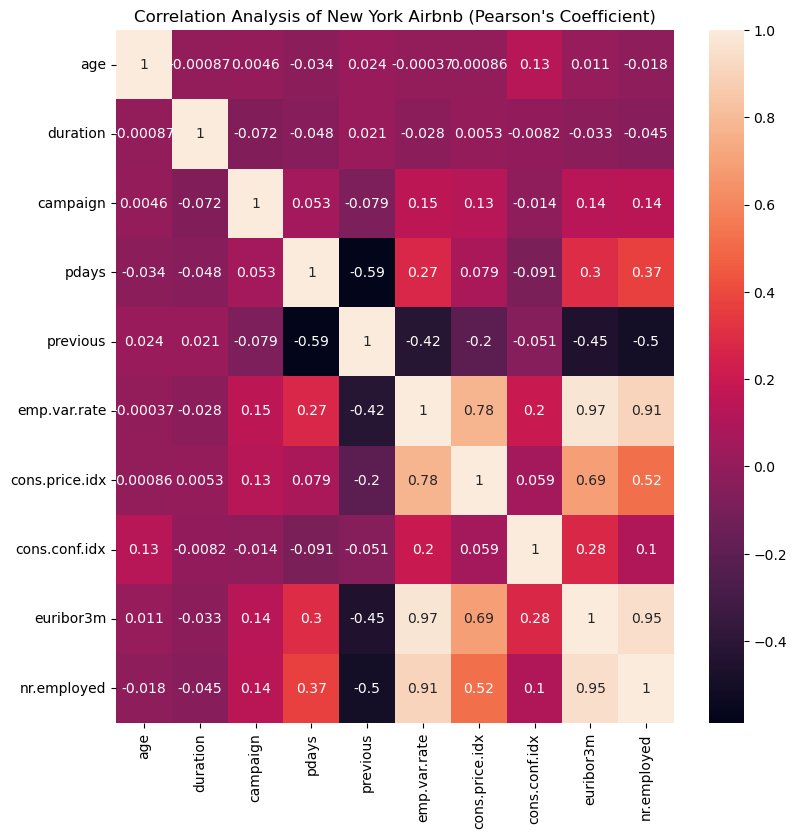

In [30]:
plt.figure(figsize=(9,9))
plt.title("Correlation Analysis of New York Airbnb (Pearson's Coefficient)")
corr = bank_data.corr()
sns.heatmap(corr, annot = True)
plt.show

In [31]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Calcula la matriz de correlación
correlation_matrix = bank_data.corr()

# Imprime las relaciones
print("Correlation relationships within the DataFrame:")
for column in correlation_matrix.columns:
    related_columns = correlation_matrix.index[abs(correlation_matrix[column]) > 0.5].tolist()
    related_columns.remove(column)  # Elimina la columna actual de la lista para evitar duplicados
    if related_columns:
        print(f"\n{column} is correlated with:")
        for related_column in related_columns:
            correlation_value = correlation_matrix.loc[related_column, column]
            print(f"  {related_column}: {correlation_value:.2f}")

warnings.filterwarnings("default", category=FutureWarning)


Correlation relationships within the DataFrame:

pdays is correlated with:
  previous: -0.59

previous is correlated with:
  pdays: -0.59
  nr.employed: -0.50

emp.var.rate is correlated with:
  cons.price.idx: 0.78
  euribor3m: 0.97
  nr.employed: 0.91

cons.price.idx is correlated with:
  emp.var.rate: 0.78
  euribor3m: 0.69
  nr.employed: 0.52

euribor3m is correlated with:
  emp.var.rate: 0.97
  cons.price.idx: 0.69
  nr.employed: 0.95

nr.employed is correlated with:
  previous: -0.50
  emp.var.rate: 0.91
  cons.price.idx: 0.52
  euribor3m: 0.95


In [32]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Calcula la matriz de correlación
correlation_matrix = bank_data.corr()

# Crea un DataFrame para almacenar las relaciones
relations_df = pd.DataFrame(columns=['Variable', 'Related Variable', 'Correlation'])

# Llena el DataFrame con las relaciones
for column in correlation_matrix.columns:
    related_columns = correlation_matrix.index[abs(correlation_matrix[column]) > 0.5].tolist()
    related_columns.remove(column)
    if related_columns:
        for related_column in related_columns:
            correlation_value = correlation_matrix.loc[related_column, column]
            relations_df = relations_df.append({'Variable': column, 'Related Variable': related_column, 'Correlation': correlation_value}, ignore_index=True)

# Ordena el DataFrame por magnitud de correlación
relations_df = relations_df.sort_values(by='Correlation', ascending=False)

# Imprime el DataFrame
print("Correlation relationships within the DataFrame:")
print(relations_df)

"""# Opcional: Gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.bar(relations_df['Variable'] + ' & ' + relations_df['Related Variable'], relations_df['Correlation'], color='skyblue')
plt.xlabel('Variable Pairs')
plt.ylabel('Correlation')
plt.title('Correlation Relationships')
plt.xticks(rotation=45, ha='right')
plt.show()"""


# Restaura la configuración original de advertencias después de ejecutar el código que genera los FutureWarnings (opcional)
warnings.filterwarnings("default", category=FutureWarning)

Correlation relationships within the DataFrame:
          Variable Related Variable  Correlation
4     emp.var.rate        euribor3m     0.972245
9        euribor3m     emp.var.rate     0.972245
11       euribor3m      nr.employed     0.945154
15     nr.employed        euribor3m     0.945154
5     emp.var.rate      nr.employed     0.906970
13     nr.employed     emp.var.rate     0.906970
3     emp.var.rate   cons.price.idx     0.775334
6   cons.price.idx     emp.var.rate     0.775334
7   cons.price.idx        euribor3m     0.688230
10       euribor3m   cons.price.idx     0.688230
8   cons.price.idx      nr.employed     0.522034
14     nr.employed   cons.price.idx     0.522034
2         previous      nr.employed    -0.501333
12     nr.employed         previous    -0.501333
0            pdays         previous    -0.587514
1         previous            pdays    -0.587514


Decidir

In [ ]:
"""age.       Edad del cliente (numérico)
job.           Tipo de trabajo (categórico)
marital.        Estado civil (categórico)
education.     Nivel de educación (categórico)
default.       ¿Tiene crédito actualmente? (categórico)
housing.       ¿Tiene un préstamo de vivienda? (categórico)
loan.          ¿Tiene un préstamo personal? (categórico)
contact.       Tipo de comunicación de contacto (categórico)
month.         Último mes en el que se le ha contactado (categórico)
day_of_week.   Último día en el que se le ha contactado (categórico)
duration.      Duración del contacto previo en segundos (numérico)
campaign.      Número de contactos realizados durante esta campaña al cliente (numérico)
pdays.         Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous.      Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome.       Resultado de la campaña de marketing anterior (categórico)
emp.var.rate.   Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx.   Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m.       Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed.    Número de empleados. Indicador trimestral (numérico)
y. TARGET.      El cliente contrata un depósito a largo plazo o no."""

In [ ]:
# importantes segun chat y Correlation

"""emp.var.rate
euribor3m
nr.employed
cons.price.idx
previous
pdays"""

### Duplicates Management

In [33]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [29]:
duplicados = bank_data[bank_data.duplicated()]
print(duplicados)  #saber si hay duplicados

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [30]:
print(f"The number of duplicated age records is: {bank_data['age'].duplicated().sum()}")
print(f"The number of duplicated job records is: {bank_data['job'].duplicated().sum()}")
print(f"The number of duplicated marital is: {bank_data['marital'].duplicated().sum()}")
print(f"The number of duplicated education records is: {bank_data['education'].duplicated().sum()}")
print(f"The number of duplicated default records is: {bank_data['default'].duplicated().sum()}")
print(f"The number of duplicated housing records is: {bank_data['housing'].duplicated().sum()}")
print(f"The number of duplicated loan records is: {bank_data['loan'].duplicated().sum()}")
print(f"The number of duplicated contact records is: {bank_data['contact'].duplicated().sum()}")
print(f"The number of duplicated month records is: {bank_data['month'].duplicated().sum()}")
print(f"The number of duplicated day of week records is: {bank_data['day_of_week'].duplicated().sum()}")
print(f"The number of duplicated duration records is: {bank_data['duration'].duplicated().sum()}")
print(f"The number of duplicated campaign records is: {bank_data['campaign'].duplicated().sum()}")
print(f"The number of duplicated pdays records is: {bank_data['pdays'].duplicated().sum()}")
print(f"The number of duplicated previous records is: {bank_data['previous'].duplicated().sum()}")
print(f"The number of duplicated poutcome records is: {bank_data['poutcome'].duplicated().sum()}")
print(f"The number of duplicated emp.var.rate records is: {bank_data['emp.var.rate'].duplicated().sum()}")
print(f"The number of duplicated cons.price.idx records is: {bank_data['cons.price.idx'].duplicated().sum()}")
print(f"The number of duplicated cons.conf.idx records is: {bank_data['cons.conf.idx'].duplicated().sum()}")
print(f"The number of duplicated euribor3m records is: {bank_data['euribor3m'].duplicated().sum()}")
print(f"The number of duplicated nr.employed records is: {bank_data['nr.employed'].duplicated().sum()}")
print(f"The number of duplicated y records is: {bank_data['y'].duplicated().sum()}")

The number of duplicated age records is: 41110
The number of duplicated job records is: 41176
The number of duplicated marital is: 41184
The number of duplicated education records is: 41180
The number of duplicated default records is: 41185
The number of duplicated housing records is: 41185
The number of duplicated loan records is: 41185
The number of duplicated contact records is: 41186
The number of duplicated month records is: 41178
The number of duplicated day of week records is: 41183
The number of duplicated duration records is: 39644
The number of duplicated campaign records is: 41146
The number of duplicated pdays records is: 41161
The number of duplicated previous records is: 41180
The number of duplicated poutcome records is: 41185
The number of duplicated emp.var.rate records is: 41178
The number of duplicated cons.price.idx records is: 41162
The number of duplicated cons.conf.idx records is: 41162
The number of duplicated euribor3m records is: 40872
The number of duplicated

In [31]:
bank_data = bank_data.drop_duplicates().reset_index(drop = True)
bank_data.head() #borra duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
duplicados = bank_data[bank_data.duplicated()]
print(duplicados)  #saber si hay duplicados, comprobar que ya no hay

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


### Eliminate irrelevant information

In [33]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [34]:
#las variables que quieres eliminar

bank_data.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome', 'cons.conf.idx'], axis=1, inplace=True)


In [ ]:
# Lista de columnas que deseas conservar
"""columnas_a_conservar = [
    "job", "marital", "education", "default", "housing", "loan", 
    "duration", "campaign", "pdays", "previous", "poutcome", 
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

bank_data_filtrado = bank_data[columnas_a_conservar]

print(bank_data_filtrado.columns)"""

## **Step 3: Analysis of univariate variables**

### Analysis on categorical variables

In [35]:
categorical_columns = bank_data.select_dtypes(include = ['O'])
categorical_columns.columns

Index(['y'], dtype='object')

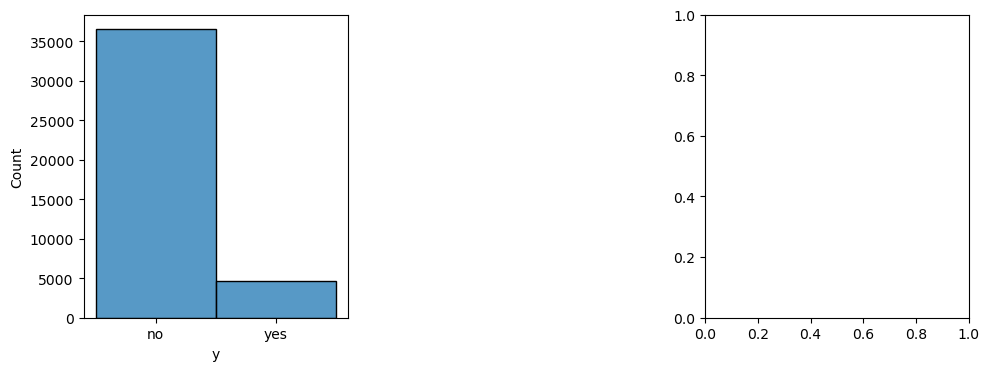

In [52]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))
sns.histplot(ax=axis[0, 0], data=bank_data, x="y")
# Remove unnecessary subplots
fig.delaxes(axis[0, 1])
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Analysis on numeric variables

In [36]:
numerical_columns = bank_data.select_dtypes(include = np.number)
numerical_columns.columns

Index(['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

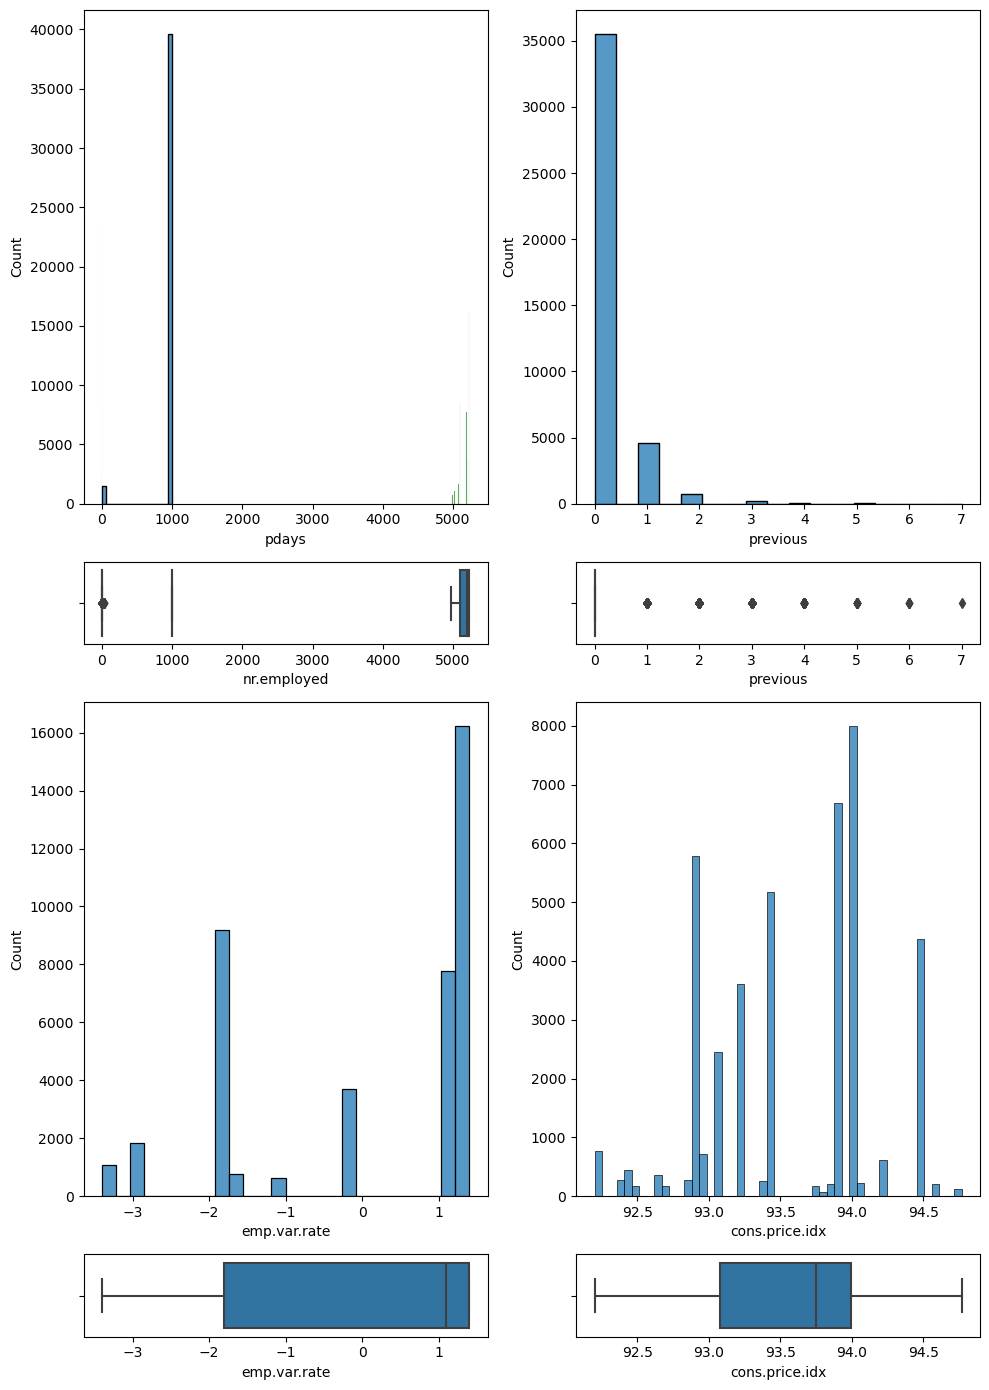

In [55]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]}) #jugar con ratio

#buscar como ampliar la imagen(bins)

sns.histplot(ax = axis[0, 0], data = bank_data, x = "pdays")
sns.boxplot(ax = axis[1, 0], data = bank_data, x = "pdays")

sns.histplot(ax = axis[0, 1], data = bank_data, x = "previous")
sns.boxplot(ax = axis[1, 1], data = bank_data, x = "previous")

sns.histplot(ax = axis[2, 0], data = bank_data, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = bank_data, x = "emp.var.rate")

sns.histplot(ax = axis[2,1], data = bank_data, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = bank_data, x = "cons.price.idx")

sns.histplot(ax = axis[0, 0], data = bank_data, x = "euribor3m")
sns.boxplot(ax = axis[1, 0], data = bank_data, x = "euribor3m")

sns.histplot(ax = axis[0, 0], data = bank_data, x = "nr.employed")
sns.boxplot(ax = axis[1, 0], data = bank_data, x = "nr.employed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **Step 4: Analysis of multivariate variables**

### Numerical-numerical analysis

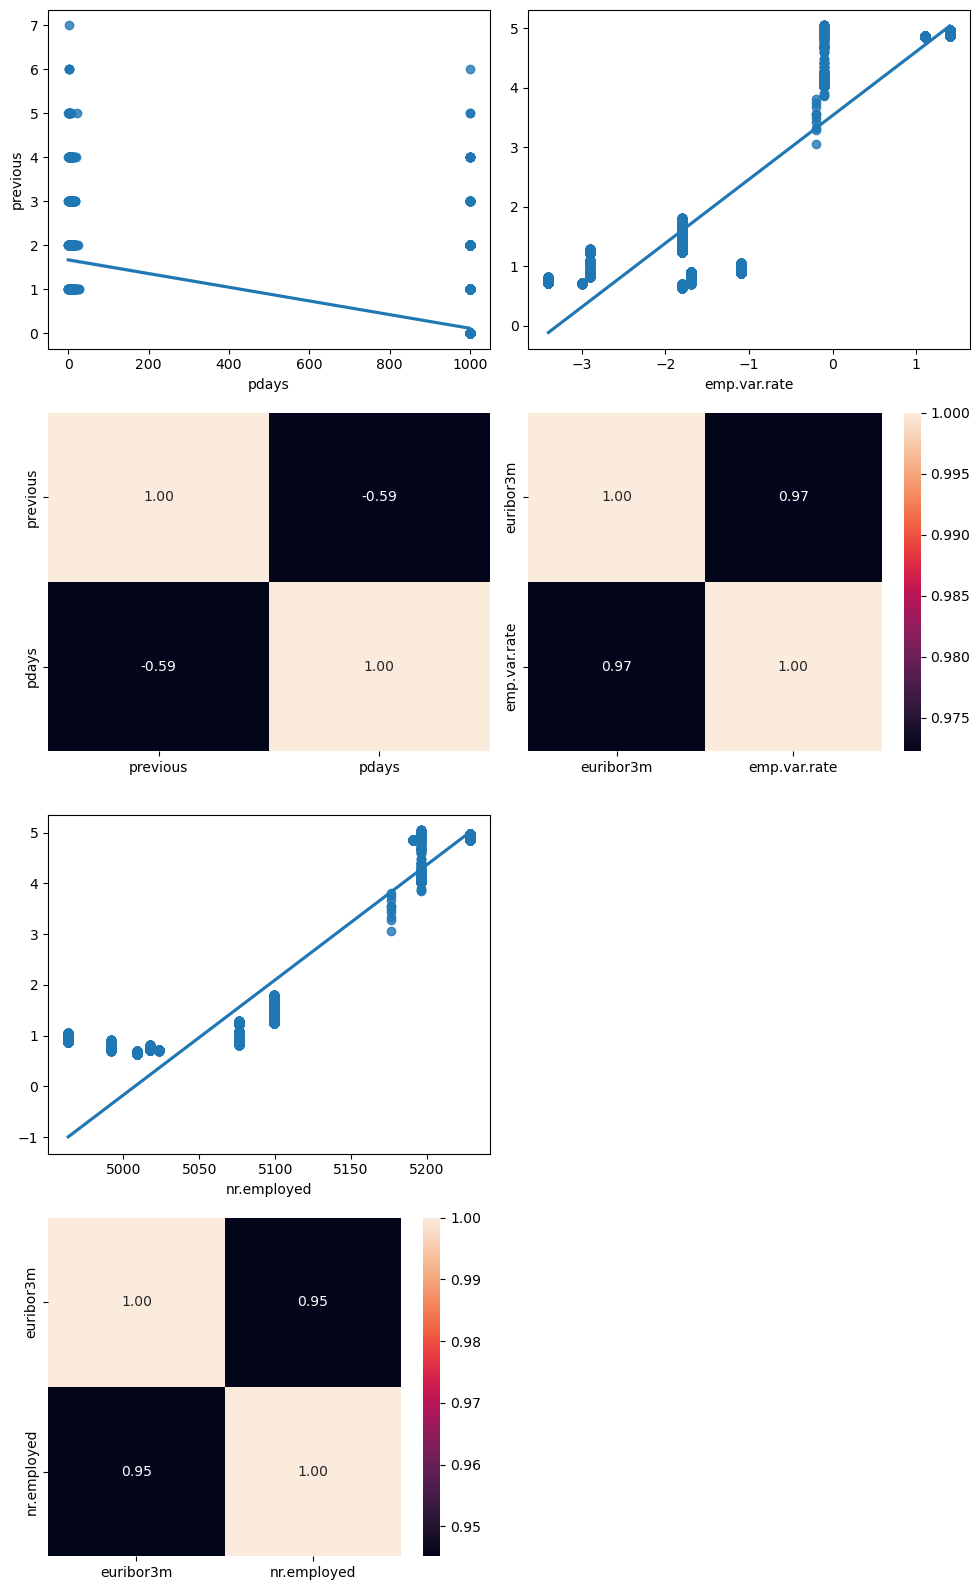

In [56]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = bank_data, x = "pdays", y = "previous")
sns.heatmap(bank_data[["previous", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = bank_data, x = "emp.var.rate", y = "euribor3m").set(ylabel = None)
sns.heatmap(bank_data[["euribor3m", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = bank_data, x = "nr.employed", y = "euribor3m").set(ylabel = None)
sns.heatmap(bank_data[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Categorical-categorical analysis


In [57]:
categorical_columns = bank_data.select_dtypes(include = ['O'])
categorical_columns.columns

Index(['y'], dtype='object')

only Y is categorical

### Numerical-categorical analysis (complete)

In [58]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           41176 non-null  int64  
 1   previous        41176 non-null  int64  
 2   emp.var.rate    41176 non-null  float64
 3   cons.price.idx  41176 non-null  float64
 4   euribor3m       41176 non-null  float64
 5   nr.employed     41176 non-null  float64
 6   y               41176 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 2.2+ MB


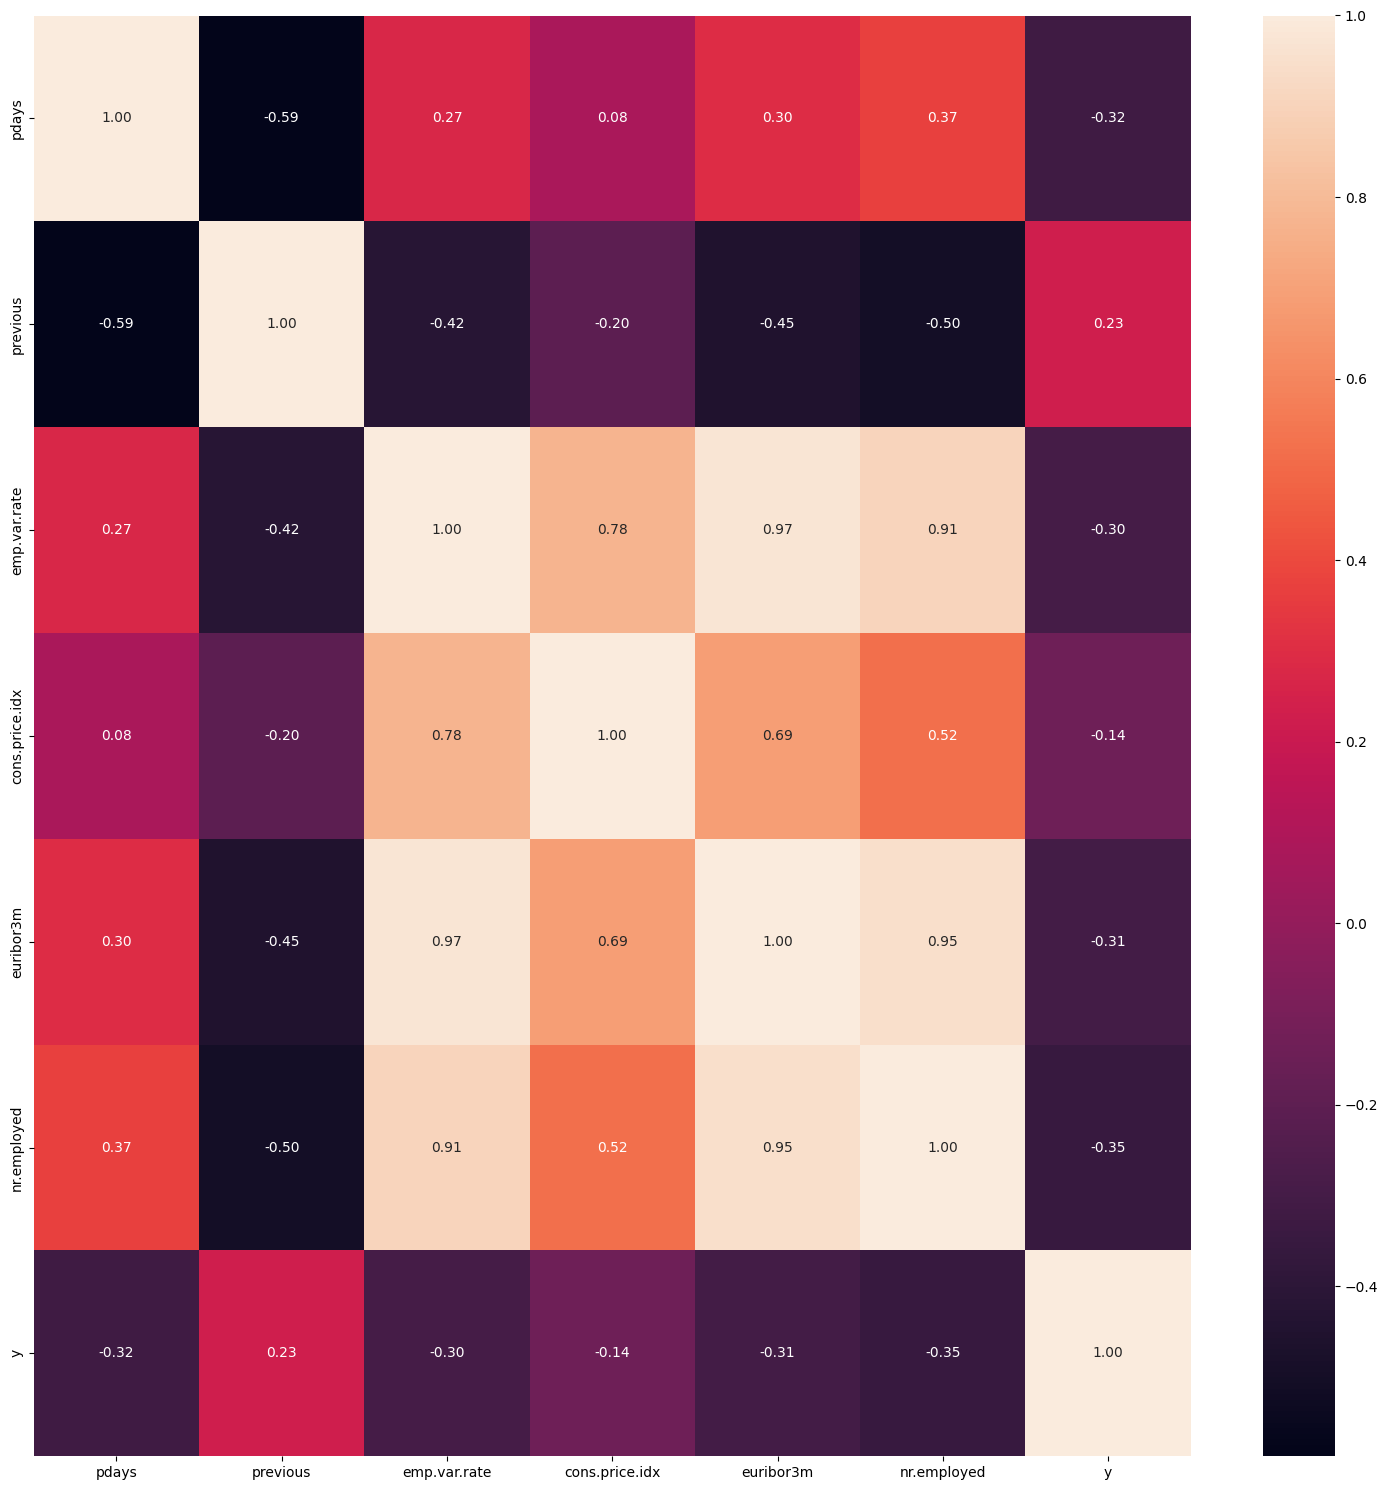

In [38]:
# Factorize the Room Type and Neighbourhood Data
bank_data["y"] = pd.factorize(bank_data["y"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(bank_data[["pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m",	
                        "nr.employed", "y"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

### Analysing all the Data at Once

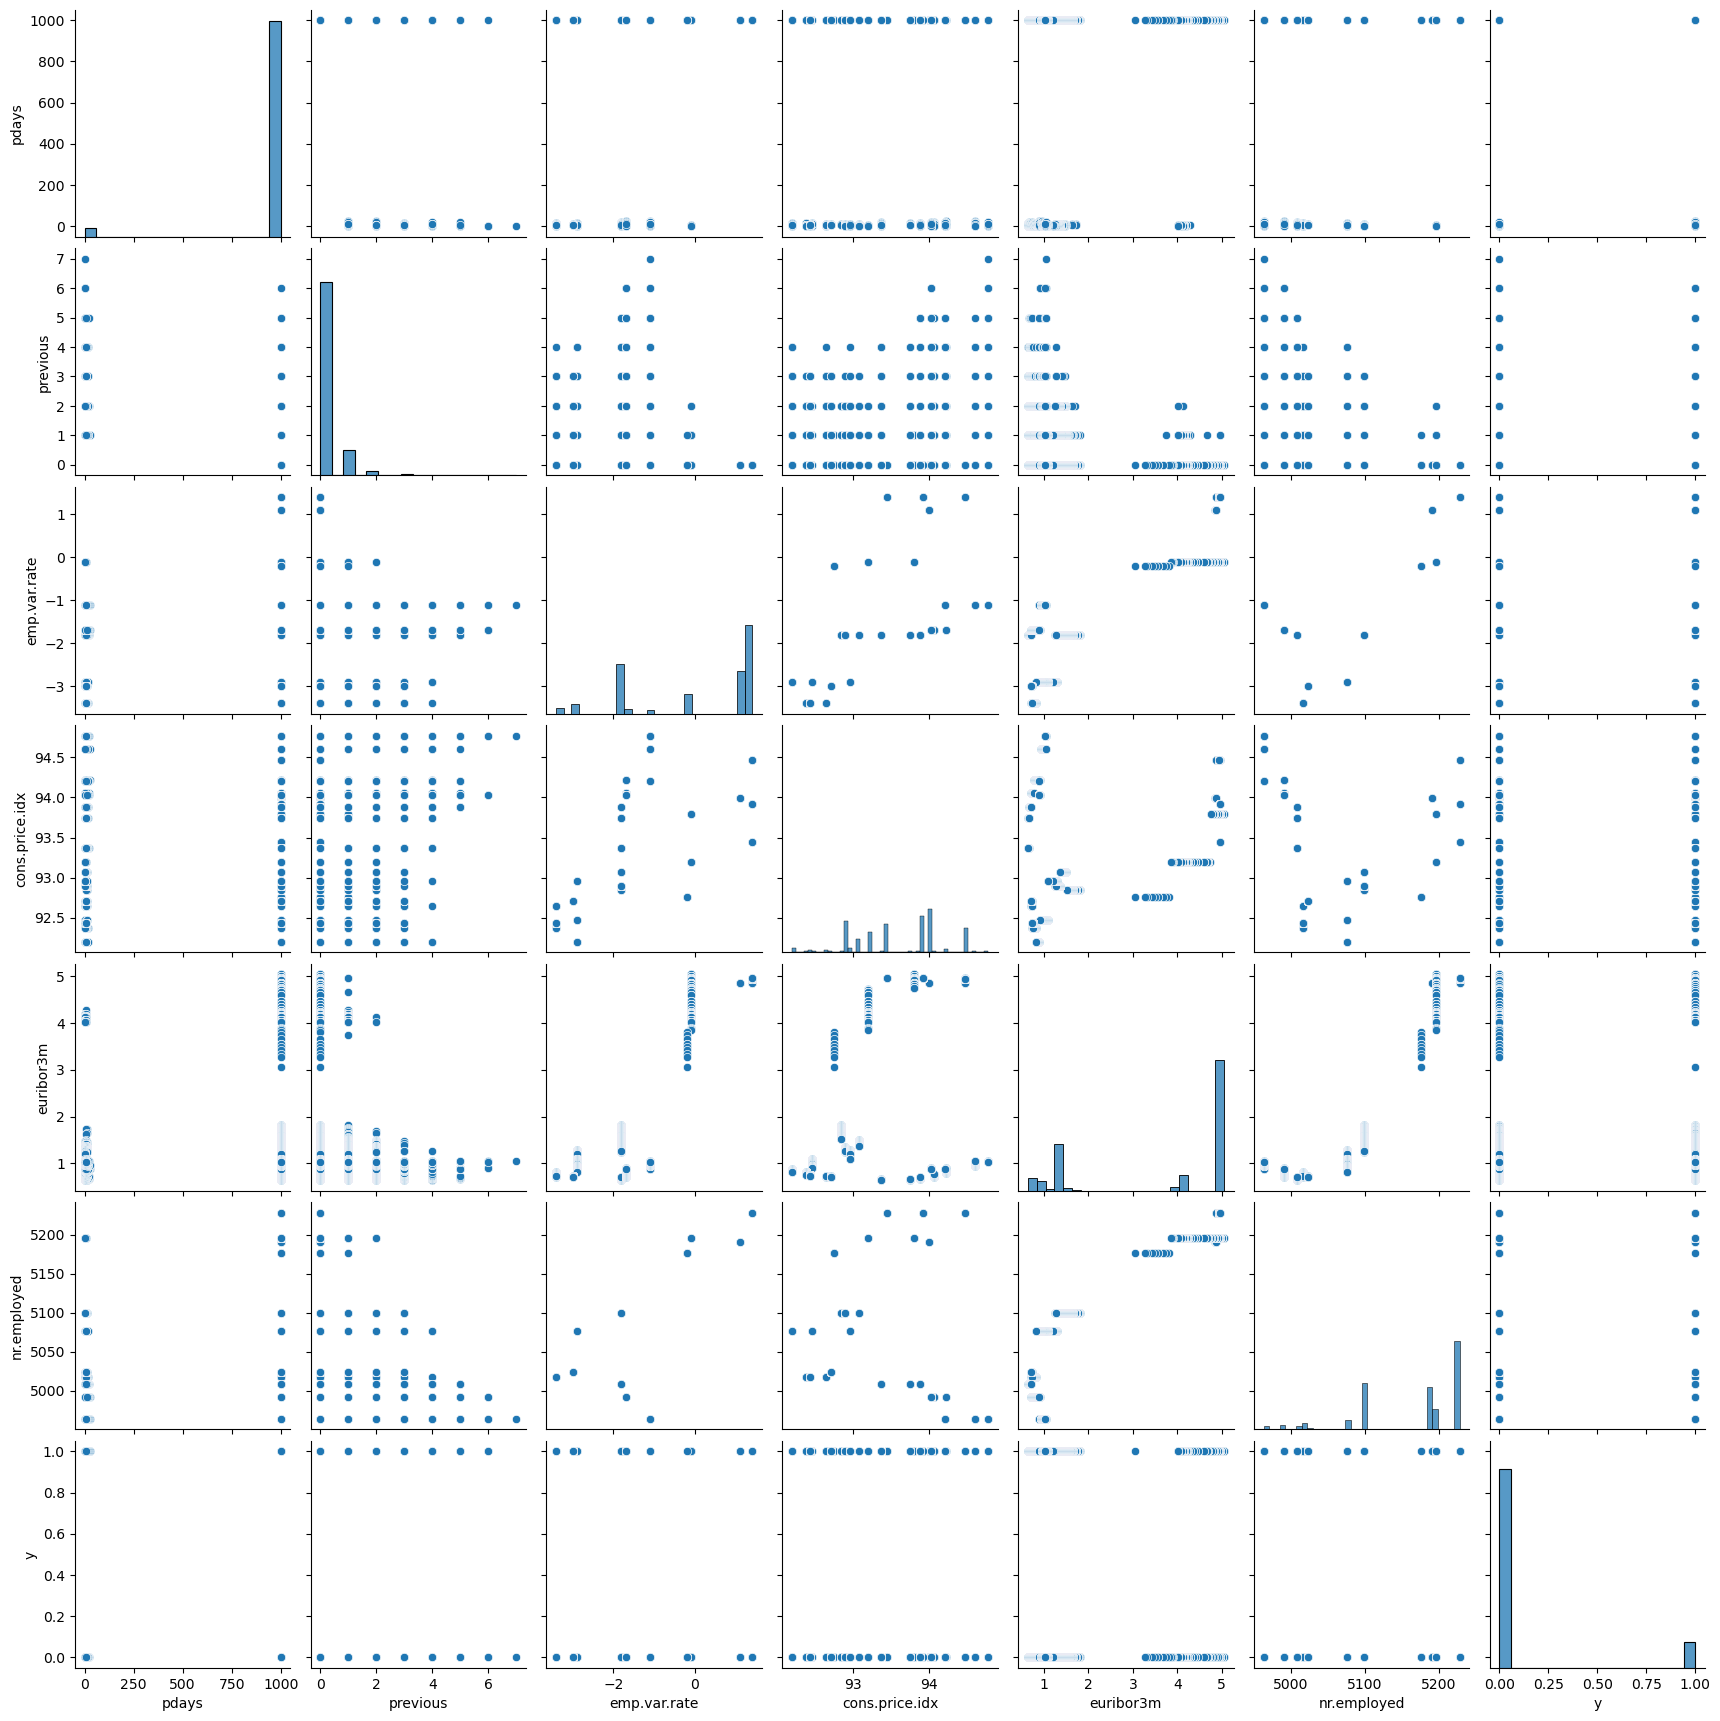

In [63]:
sns.pairplot(data = bank_data)

## **Step 5: Feature engineering**

### Outlier analysis

In [64]:
bank_data.describe()

,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,962.464810,0.173013,0.081922,93.575720,3.621293,5167.034870,0.112663
std,186.937102,0.494964,1.570883,0.578839,1.734437,72.251364,0.316184
min,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000
25%,999.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000
50%,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000
75%,999.000000,0.000000,1.400000,93.994000,4.961000,5228.100000,0.000000
max,999.000000,7.000000,1.400000,94.767000,5.045000,5228.100000,1.000000


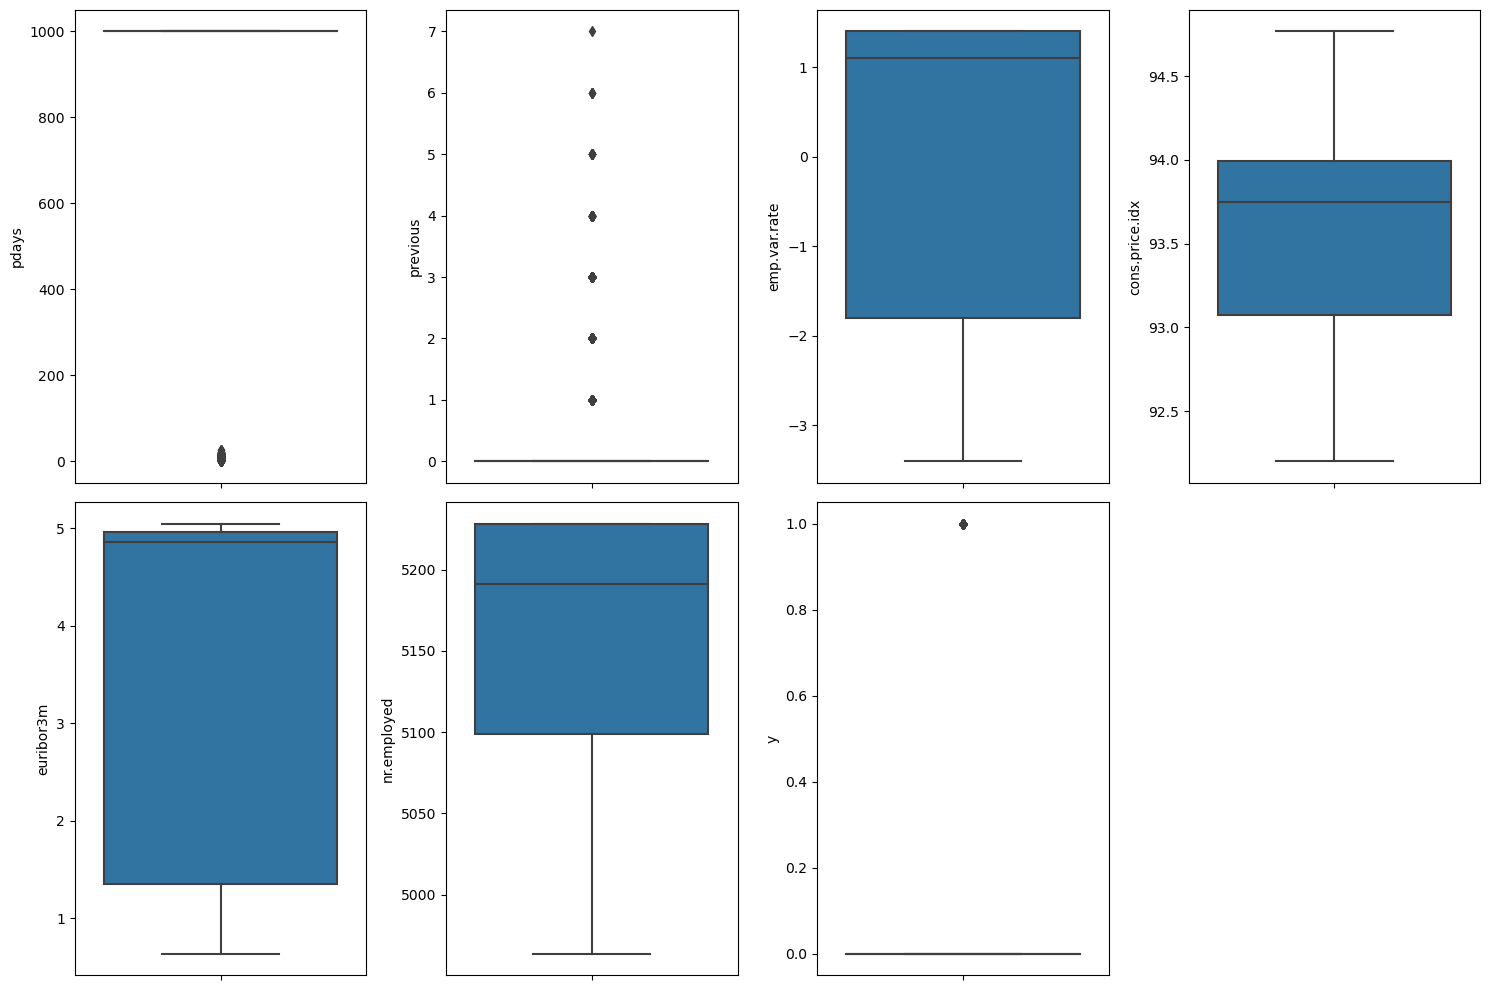

In [67]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=bank_data, y="pdays")
sns.boxplot(ax=axes[0, 1], data=bank_data, y="previous")
sns.boxplot(ax=axes[0, 2], data=bank_data, y="emp.var.rate")
sns.boxplot(ax=axes[0, 3], data=bank_data, y="cons.price.idx")
sns.boxplot(ax=axes[1, 0], data=bank_data, y="euribor3m")
sns.boxplot(ax=axes[1, 1], data=bank_data, y="nr.employed")
sns.boxplot(ax=axes[1, 2], data=bank_data, y="y")

# Remove empty subplots
fig.delaxes(axes[1, 3])

plt.tight_layout()

plt.show()


### Outlier detection for Y(El cliente contrata un depósito a largo plazo o no.)

In [71]:
# Stats for Price
contrato = bank_data["y"].describe()
contrato

count    41176.000000
mean         0.112663
std          0.316184
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

### Outlier detection for previous (Número de contactos realizados durante la campaña anterior al cliente )

In [74]:
# Stats for Price
previous = bank_data["previous"].describe()
previous

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [75]:
# IQR for previous

price_iqr = previous["75%"] - previous["25%"]
upper_limit = previous["75%"] + 1.5 * price_iqr
lower_limit = previous["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 0")


The upper and lower limits for finding outliers are 0.0 and 0.0, with an interquartile range of 0


In [82]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           41176 non-null  int64  
 1   previous        41176 non-null  int64  
 2   emp.var.rate    41176 non-null  float64
 3   cons.price.idx  41176 non-null  float64
 4   euribor3m       41176 non-null  float64
 5   nr.employed     41176 non-null  float64
 6   y               41176 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.2 MB


### Feature scaling

In [39]:
#ya he factorizado anteriormente, es decir, son todas ya numericas, si hubiera categoricas habria que hacer un factorize

num_variables = ["pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "y"]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(bank_data[num_variables])
bank_data_scal = pd.DataFrame(scaled_features, index=bank_data.index, columns=num_variables)
bank_data_scal.head()

,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,1.0,0.0,0.9375,0.698753,0.957379,0.859735,0.0
1,1.0,0.0,0.9375,0.698753,0.957379,0.859735,0.0
2,1.0,0.0,0.9375,0.698753,0.957379,0.859735,0.0
3,1.0,0.0,0.9375,0.698753,0.957379,0.859735,0.0
4,1.0,0.0,0.9375,0.698753,0.957379,0.859735,0.0


## **Step 6: Feature selection**

In [40]:
X = bank_data_scal.drop("y", axis = 1)
y = bank_data_scal["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,pdays,previous,emp.var.rate,euribor3m,nr.employed
0,1.0,0.0,1.000000,0.980730,1.000000
1,1.0,0.0,0.333333,0.138291,0.512287
2,1.0,0.0,0.937500,0.956926,0.859735
3,1.0,0.0,0.937500,0.957379,0.859735
4,1.0,0.0,0.333333,0.175924,0.512287


In [41]:
X_test_sel.head()

,pdays,previous,emp.var.rate,euribor3m,nr.employed
0,1.0,0.000000,0.104167,0.143278,0.425709
1,1.0,0.142857,0.333333,0.150759,0.512287
2,1.0,0.000000,0.479167,0.073679,0.000000
3,1.0,0.142857,0.333333,0.150759,0.512287
4,1.0,0.000000,1.000000,0.981410,1.000000


In [42]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

## **Step 7:Logistic Regression model**

In [43]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")
train_data.head()

#gitignore

,pdays,previous,emp.var.rate,euribor3m,nr.employed,y
0,1.0,0.0,1.000000,0.980730,1.000000,0.0
1,1.0,0.0,0.333333,0.138291,0.512287,0.0
2,1.0,0.0,0.937500,0.956926,0.859735,0.0
3,1.0,0.0,0.937500,0.957379,0.859735,0.0
4,1.0,0.0,0.333333,0.175924,0.512287,0.0


In [45]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Accuracy of train data**

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
accuracy_score(y_test, y_pred)

0.8950947061680428

In [49]:
print(len(y_train))
print(len(y_pred))


37058
4118


In [50]:
# Check the alignment of data by comparing the lengths of y_train and y_pred
if len(y_train) != len(y_pred):
    print("Mismatched lengths between y_train and y_pred.")
else:
    print("Length of y_train:", len(y_train))
    print("Length of y_pred:", len(y_pred))


Mismatched lengths between y_train and y_pred.


## **Step 8: Model optimization**

In [51]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [54]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
accuracy_score(y_test, y_pred)

0.8950947061680428

In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))